In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
#Limiting display to 16 rows

pd.options.display.max_rows = 16

In [48]:
### plotting with pandas
## dataset source of global population health and wealth statistics : https://wwwgapminder.org
## dataset source of baby names: https://www.ssa.gov/oact/babynames/limits.html

In [3]:
#loading file

gapminder = pd.read_csv('/Users/saadkhan/Desktop/self pace/python.jupyter/Ex_Files_Python_Data_Analysis/Exercise Files/chapter6/gapminder.csv')

In [4]:
# Exploratory Analysis
# checking columns and data

gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0


In [5]:
# creating a column using log10 for per day gdp per capita

gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita']/365.25)

In [66]:
# again checking columns and data

gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_pdg_per_day,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314,0.248314


In [6]:
# indexing column 'year' and then sorting it with the same index

gapminder_by_year = gapminder.set_index('year').sort_index()

In [68]:
# again checking columns and data

gapminder_by_year.head()

,country,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_pdg_per_day,log_gdp_per_day
year,,,,,,,,,
1800,Afghanistan,Asia,3280000.0,28.21,53.142,7.00,603.0,0.217727,0.217727
1800,Guyana,America,166034.0,31.12,57.084,5.01,1214.0,0.521628,0.521628
1800,Guinea-Bissau,Africa,218167.0,32.00,58.256,7.25,777.0,0.327831,0.327831
1800,Guinea,Africa,983959.0,29.50,54.940,6.11,450.0,0.090622,0.090622
1800,Guatemala,America,458965.0,25.80,49.664,6.45,857.0,0.370391,0.370391


In [7]:
# indexing column 'country' and then sorting it with the same index

gapminder_by_country = gapminder.set_index('country').sort_index()

In [70]:
# again checking columns and data

gapminder_by_country.head()

,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_pdg_per_day,log_gdp_per_day
country,,,,,,,,,
Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,0.217727,0.217727
Afghanistan,1993,Asia,14824371.0,49.50,83.800,7.76,810.0,0.345895,0.345895
Afghanistan,1992,Asia,13745630.0,49.40,83.220,7.73,941.0,0.410999,0.410999
Afghanistan,1991,Asia,12789374.0,49.30,82.580,7.70,1022.0,0.446861,0.446861
Afghanistan,1990,Asia,12067570.0,49.50,81.900,7.69,1028.0,0.449403,0.449403


<AxesSubplot:xlabel='log_gdp_per_day', ylabel='life_expectancy'>

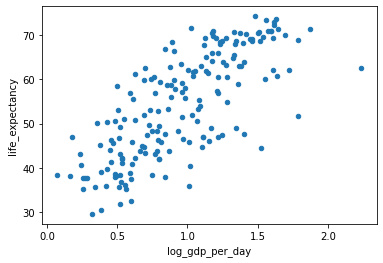

In [71]:
# creating scatter plot of gdp per day vs life expectancy of year 1960

gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','life_expectancy')

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

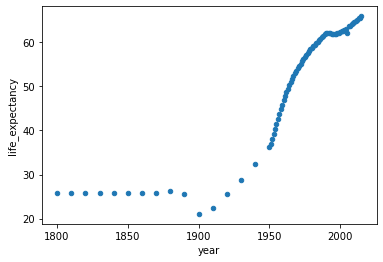

In [15]:
# creating scatter plot of life expectancy over the years of country Pakistan

gapminder_by_country.loc['Pakistan'].plot.scatter('year','life_expectancy')

<AxesSubplot:xlabel='log_gdp_per_day', ylabel='life_expectancy'>

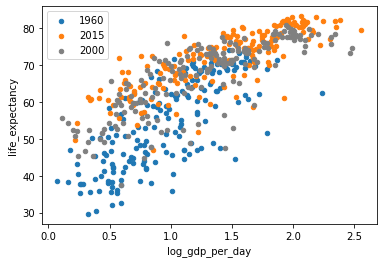

In [73]:
# creating scatter plot of gdp per day vs life expectancy for years 1960, 2000 and 2015 on same axis

axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','life_expectancy',label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','life_expectancy',label=2015, color='C1',ax=axes)
gapminder_by_year.loc[2000].plot.scatter('log_gdp_per_day','life_expectancy',label=2000,color='grey',ax=axes)

<AxesSubplot:xlabel='log_gdp_per_day', ylabel='age5_surviving'>

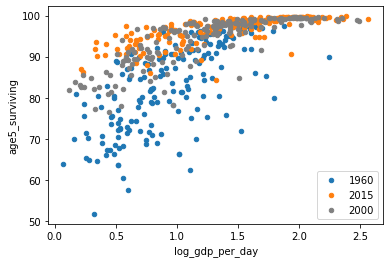

In [74]:
# creating scatter plot of gdp per day vs age5 surviving for years 1960, 2000 and 2015 on same axis

axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','age5_surviving',label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','age5_surviving',label=2015, color='C1',ax=axes)
gapminder_by_year.loc[2000].plot.scatter('log_gdp_per_day','age5_surviving',label=2000,color='grey',ax=axes)

<AxesSubplot:xlabel='year'>

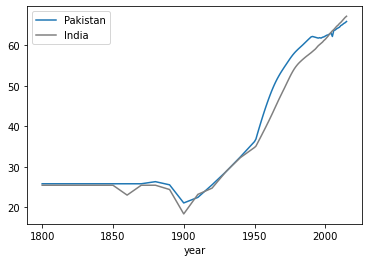

In [78]:
# creating scatter plot of life expectancy over the years of countries Pakistan and India on same axis

yay =  gapminder_by_country.loc['Pakistan'].sort_values('year').plot('year','life_expectancy',label='Pakistan')
gapminder_by_country.loc['India'].sort_values('year').plot('year','life_expectancy',label='India',color='grey',ax=yay)

In [79]:
# using groupby and mean to know the avaerage number of babies per woman born - year wise

gapminder.groupby('year').babies_per_woman.mean()

year
1800    6.105028
1810    6.094254
1820    6.094396
1830    6.085879
1840    6.072802
          ...   
2011    2.925110
2012    2.892912
2013    2.863407
2014    2.830934
2015    2.799231
Name: babies_per_woman, Length: 81, dtype: float64

Text(0, 0.5, 'age 5 survival [%]')

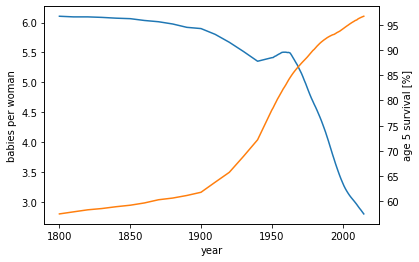

In [81]:
# creating line graph of babies per woman born and age5 survival over the years

gapminder.groupby('year').babies_per_woman.mean().plot()
pp.ylabel('babies per woman')

gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
pp.ylabel('age 5 survival [%]')

In [82]:
# checking babies born per woman, year and region wise

gapminder.pivot_table('babies_per_woman','year','region')

region,Africa,America,Asia,Europe
year,,,,
1800,6.393208,6.055758,6.291923,5.561628
1810,6.394151,6.040000,6.281154,5.540233
1820,6.394340,6.031515,6.292692,5.545909
1830,6.395472,6.046364,6.285577,5.506591
1840,6.396226,6.046970,6.255577,5.486591
...,...,...,...,...
2011,4.569811,2.340000,2.736923,1.605227
2012,4.508868,2.315152,2.700769,1.606818
2013,4.447547,2.294242,2.664038,1.617727


Text(0, 0.5, 'babies per woman')

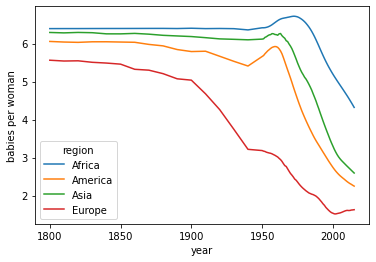

In [84]:
# creating line graph of babies born per woman, year and region wise

gapminder.pivot_table('babies_per_woman','year','region').plot()
pp.ylabel('babies per woman')

<AxesSubplot:xlabel='year'>

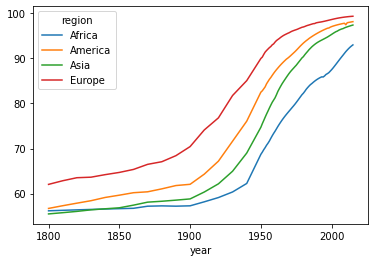

In [86]:
# creating line graph of age5 surviving, year and region wise

gapminder.pivot_table('age5_surviving','year','region').plot()

In [ ]:
# Findings from the data

# 1. The age5 survival rate considerably increased from as low as <60% in 19th century to as high as >95 in 21st century.
# 2. The average babies per woman have decreased from 6 babies per woman in 19th century to <3  babies per woman in 21st century.
# 3. The average babies per woman have reduced in all regions.
# 4. However Africa is on top with around 4-5 babies per woman in 21st century.
# 5. Also, Africa have lowest age5 survival rate of around 92% among other regions which have comparatively high survival rate.
